# Covid 19 and Pneumonia image classification CNN

Use deep Learning and AI to contribute to improving COVID-19 detection using just Chest X-rays.

**Content**
It is a simple directory structure branched into test and train folder and further branched into the respective 3 classes which contains the images (Covid, Normal, Viral Pneumonia).

These are each a different class that our learning model can output, indicating a multi-class classification problem.


In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense


2024-05-13 07:57:02.359326: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-13 07:57:02.359537: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-13 07:57:02.528380: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# Load the dataset

In [2]:
#create direct paths to train and test sets
train_path = "/kaggle/input/covid19-image-dataset/Covid19-dataset/train"
test_path = "/kaggle/input/covid19-image-dataset/Covid19-dataset/test"

# Image classes and Display

In [3]:
image_classes = os.listdir("/kaggle/input/covid19-image-dataset/Covid19-dataset/test")
image_classes

['Normal', 'Viral Pneumonia', 'Covid']

In [4]:
# Function to display an image of each class:
def plot_images_from_classes(directory, classes):
    plt.figure(figsize=(12, 4))
    for i, class_name in enumerate(classes):
        # define the path to each class directory
        class_path = os.path.join(directory, class_name)
        
        # get the list of images in the directory
        image_files = os.listdir(class_path)

        # Load the first image
        img_path = os.path.join(class_path, image_files[0])
        img = Image.open(img_path)
        
        plt.subplot(1, len(classes), i + 1)
        plt.imshow(img)
        plt.title(class_name)
        plt.axis('off')
    
    plt.show()

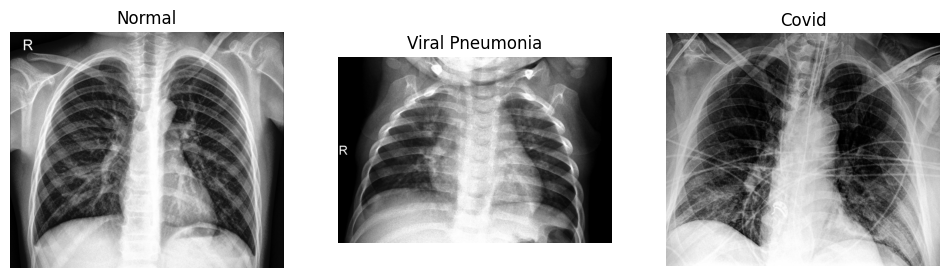

In [5]:
# Call the function to plot one image from each specified class
plot_images_from_classes(train_path, image_classes)

# Data preprocessing

In [6]:
image_generator = ImageDataGenerator(rescale = 1/255)

In [7]:
train_data = image_generator.flow_from_directory(train_path,
                                                target_size = (512, 512),
                                                batch_size = 16,
                                                class_mode = "categorical")

Found 251 images belonging to 3 classes.


In [8]:
test_data = image_generator.flow_from_directory(test_path,
                                                target_size = (512, 512),
                                                batch_size = 1,
                                                class_mode = "categorical")

Found 66 images belonging to 3 classes.


# CNN model

In [9]:
model_2 = Sequential()

In [10]:
# Input layer
model_2.add(Input(shape=(512, 512, 3)))

# Convolutional layer
model_2.add(Conv2D(filters=16, kernel_size=3, padding="same", activation="relu"))

# Pooling layer
model_2.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional layer
model_2.add(Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))

# Pooling layer
model_2.add(MaxPooling2D())

# Convolutional layer
model_2.add(Conv2D(filters=128, kernel_size=3, padding="same", activation="relu"))

# Pooling layer
model_2.add(MaxPooling2D())

# Flatten layer
model_2.add(Flatten())

# Fully Connected layer
model_2.add(Dense(128, activation="relu"))
model_2.add(Dense(128, activation="relu"))

# Output layer
model_2.add(Dense(3, activation="softmax"))

In [11]:
model_2.compile(optimizer = "adam", 
             loss = "categorical_crossentropy",
             metrics = ["accuracy"])

In [12]:
history = model_2.fit(train_data, 
                         epochs = 5,
                         validation_data = test_data ) # use the test data as the validation data

Epoch 1/5


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


16/16 ━━━━━━━━━━━━━━━━━━━━ 80s 4s/step - accuracy: 0.4063 - loss: 3.7577 - val_accuracy: 0.7424 - val_loss: 0.7537
Epoch 2/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 74s 4s/step - accuracy: 0.8383 - loss: 0.4080 - val_accuracy: 0.6667 - val_loss: 0.8591
Epoch 3/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 82s 4s/step - accuracy: 0.8987 - loss: 0.2474 - val_accuracy: 0.8485 - val_loss: 0.4596
Epoch 4/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 81s 4s/step - accuracy: 0.9350 - loss: 0.1218 - val_accuracy: 0.9091 - val_loss: 0.1841
Epoch 5/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 73s 4s/step - accuracy: 0.9759 - loss: 0.0463 - val_accuracy: 0.9242 - val_loss: 0.3659


In [13]:
model_2.evaluate(test_data)

66/66 ━━━━━━━━━━━━━━━━━━━━ 6s 91ms/step - accuracy: 0.8946 - loss: 0.5944


[0.3658500015735626, 0.9242424368858337]

# Training and validation data visualisation

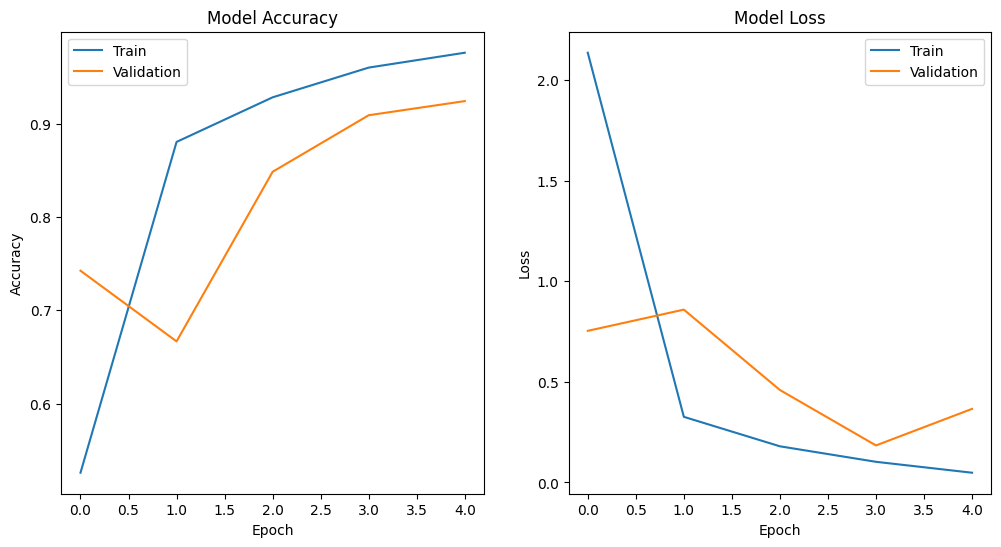

In [14]:
# plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

#pplot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.show()


# Results interpretation

The final evaluation on the test dataset shows that the model has a high accuracy of approximately 92.65%, and a low loss of 0.2096, which confirms that the model performs well on unseen data. The slight discrepancy between the loss reported and the value in the array might be due to rounding or the exact point of logging, but both values are very close and indicate good model performance.

The model demonstrates strong performance on both the training and validation sets, with a slight indication of potential overfitting in the middle epochs as evidenced by fluctuating validation loss. The high test accuracy aligns with the validation accuracy, suggesting that the model is robust and generalises well to new data. 

Improvements: 
- Implement techniques like dropout or regularisation to further control for overfitting
- Try different architectures or tuning hyperparameters to stabilise validation loss across epochs.
